# Effect of capacity utilization on unitary performance of a truck
[Romain Sacchi](https://github.com/romainsacchi)

## Purpose

Most static LCA models, such as those contained in inventory databases, scale linearly.
While this is not an issue for systems where marginal impacts are similar to average impacts, such as 1 kWh from a coal-fired power plant, it is more problematic for systems that are greatly influenced by the loading factor.
Examples are renewable energy sources (solar PV, wind mills), but also passenger and goods vehicles.

Demonstrate the non-linear relation between increment in load transported and environmental impacts per ton-kilometer. THis is done using a 40-ton diesel truck.

A second example is the non-linear relation between trip distance and environmental impacts per ton-kilometer. This is done using a 40-ton battery electric truck.

Both examples use the [carculator_truck](https://github.com/romainsacchi/carculator_truck) library.

## Methodology

1. Set up a truck LCA model
2. Solve the system (sizing of components, incl. energy storage) given the load required
3. Solve inventory and display impacts

Repeat steps 1 to 3 for each increment in payload.

The same is done with increasing the trip length.


## Results

GHG emissions per ton-km do not scale linearly with transported load. Also, the marginal impact of adding cargo mass on the ton-km GHG emissions is decreasing. Hence, transporting 10 tons over 1 km does not equal transporting 1 ton over 1 km ten times.

Similarly, increasing the range capacity of a battery electric truck does not scale linearly with the per ton-km GHG emissions. 


# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib.pyplot as plt
import matplotlib as mpl

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys

try:
    import carculator_truck as ct
except ModuleNotFoundError:
    !{sys.executable} -m pip install carculator_truck
    import carculator_truck as ct

In [3]:
ct.__version__

(0, 0, 3)

# Parameter definition


In [4]:
LIFETIME_KM = 200000

# Data import


In [167]:
tip = ct.TruckInputParameters() 
tip.static()
_, array = ct.fill_xarray_from_input_parameters(tip)

# Data processing

In [168]:
l_res=[
    [
    "powertrain type",
    "size",
    "target range [km]",
    "lifetime [km]",
    "curb mass [kg]",
    "total cargo mass [kg]",
    "capacity utilization [%]",
    "energy battery mass [kg]",
    "fuel mass [kg]",
    "electric energy stored [kWh]",
    "oxidation energy stored [kj]",
    'direct - exhaust',
    'direct - non-exhaust',
    'energy chain',
    'maintenance',
    'glider',
    'EoL',
    'powertrain',
    'energy storage',
    'road'
    ]
      ]
      
for load_factor in np.arange(0.01, 1.06, 0.05):
    
    array.loc[dict(parameter="capacity utilization")] = load_factor
    tm = ct.TruckModel(array, cycle="Long haul", country="RER")
    tm.set_all()
    
    ic = ct.InventoryCalculation(tm.array, fuel_blend=tm.fuel_blend, country=tm.country)
    res = ic.calculate_impacts()
    
    for pt in tm.array.powertrain.values:
        for s in tm.array.coords["size"].values:
            specs = [pt, s]
            specs.extend(tm.array.sel(powertrain=pt,
                                      size=s,
                                      year=2020,
                                      value=0,
                                      parameter=[
                                        "target range",
                                        "lifetime kilometers",
                                        "curb mass",
                                        "total cargo mass",
                                        "capacity utilization",
                                        "energy battery mass",
                                        "fuel mass",
                                        "electric energy stored",
                                        "oxidation energy stored",
                                      ]).values.tolist()
                        )
            
            lcia = res.sel(powertrain=pt, size=s, year=2020, impact_category="climate change", value=0).values.tolist()
            
            specs.extend(lcia)
            l_res.append(specs)

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2010    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2020    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2030    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2040    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2050    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2000   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2010   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2020   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2030   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2040   | 0.01 | 0.01 | 0.01 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
|                |         18t          |         26t          |         3.5t         |         40t          |         60t          |         7.5t         |
+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
|   BEV, 2000    | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 |
|   BEV, 2010    | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 | 0.060000000000000005 |
|   BEV, 2020    | 0.060000000000000005 | 0.060000


Payload (in tons)
+--------------+-----+-----+------+-----+-----+------+
|              | 18t | 26t | 3.5t | 40t | 60t | 7.5t |
+--------------+-----+-----+------+-----+-----+------+
| ICEV-d, 2000 | 0.6 | 1.1 | 0.1  | 1.6 | 2.4 | 0.3  |
| ICEV-d, 2010 | 0.7 | 1.1 | 0.1  | 1.6 | 2.4 | 0.3  |
| ICEV-d, 2020 | 0.7 | 1.1 | 0.2  | 1.6 | 2.4 | 0.3  |
| ICEV-d, 2030 | 0.7 | 1.2 | 0.2  | 1.7 | 2.6 | 0.3  |
| ICEV-d, 2040 | 0.8 | 1.2 | 0.2  | 1.8 | 2.7 | 0.3  |
| ICEV-d, 2050 | 0.8 | 1.2 | 0.2  | 1.9 | 2.8 | 0.3  |
| ICEV-g, 2000 | 0.6 | 1.0 | 0.1  | 1.5 | 2.3 | 0.2  |
| ICEV-g, 2010 | 0.6 | 1.0 | 0.1  | 1.6 | 2.3 | 0.3  |
| ICEV-g, 2020 | 0.7 | 1.1 | 0.1  | 1.6 | 2.4 | 0.3  |
| ICEV-g, 2030 | 0.7 | 1.1 | 0.2  | 1.7 | 2.6 | 0.3  |
| ICEV-g, 2040 | 0.8 | 1.2 | 0.2  | 1.8 | 2.7 | 0.3  |
| ICEV-g, 2050 | 0.8 | 1.2 | 0.2  | 1.8 | 2.8 | 0.3  |
| PHEV-d, 2000 |  -  |  -  |  -   |  -  |  -  |  -   |
| PHEV-d, 2010 |  -  |  -  |  -   |  -  |  -  |  -   |
| PHEV-d, 2020 | 0.3 | 0.5 |  -   | 1.1 | 1.8 

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2010    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2020    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2030    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2040    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2050    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2000   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2010   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2020   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2030   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2040   | 0.11 | 0.11 | 0.11 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                |         18t         |         26t         |         3.5t        |         40t         |         60t         |         7.5t        |
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   BEV, 2000    | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 |
|   BEV, 2010    | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 | 0.16000000000000003 |
|   BEV, 2020    | 0.16000000000000003 | 0.16000000000000003 | 0.160000000000000

BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                |         18t         |         26t         |         3.5t        |         40t         |         60t         |         7.5t        |
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   BEV, 2000    | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 |
|   BEV, 2010    | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 | 0.21000000000000002 |
|   BEV, 2020    | 0.21000000000000002 | 0.21000000000000002 | 0.210000000000000

BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040 _________________________________________ 8.0%
 	 *

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2010    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2020    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2030    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2040    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2050    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2000   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2010   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2020   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2030   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2040   | 0.26 | 0.26 | 0.26 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                |         18t         |         26t         |         3.5t        |         40t         |         60t         |         7.5t        |
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   BEV, 2000    | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 |
|   BEV, 2010    | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 | 0.31000000000000005 |
|   BEV, 2020    | 0.31000000000000005 | 0.31000000000000005 | 0.310000000000000

BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040 _________________________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                |         18t         |         26t         |         3.5t        |         40t         |         60t         |         7.5t        |
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   BEV, 2000    | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 |
|   BEV, 2010    | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 | 0.36000000000000004 |
|   BEV, 2020    | 0.36000000000000004 | 0.36000000000000004 | 0.360000000000000

PHEV-d 40t 2000
PHEV-d 40t 2010
PHEV-d 60t 2000
PHEV-d 60t 2010
PHEV-d 7.5t 2000
PHEV-d 7.5t 2010
PHEV-d 7.5t 2020
BEV 18t 2000
BEV 18t 2010
BEV 26t 2000
BEV 26t 2010
BEV 3.5t 2000
BEV 3.5t 2010
BEV 3.5t 2020
BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 ______________________________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                |         18t         |         26t         |         3.5t        |         40t         |         60t         |         7.5t        |
+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   BEV, 2000    | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 |
|   BEV, 2010    | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 | 0.41000000000000003 |
|   BEV, 2020    | 0.41000000000000003 | 0.41000000000000003 | 0.410000000000000

BEV 3.5t 2000
BEV 3.5t 2010
BEV 3.5t 2020
BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2010    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2020    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2030    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2040    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2050    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2000   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2010   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2020   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2030   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2040   | 0.46 | 0.46 | 0.46 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2010    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2020    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2030    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2040    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2050    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2000   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2010   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2020   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2030   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2040   | 0.51 | 0.51 | 0.51 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2010    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2020    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2030    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2040    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2050    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2000   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2010   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2020   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2030   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2040   | 0.56 | 0.56 | 0.56 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                |        18t         |        26t         |        3.5t        |        40t         |        60t         |        7.5t        |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   BEV, 2000    | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 |
|   BEV, 2010    | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 |
|   BEV, 2020    | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.6100000000000001 | 0.61000

BEV 18t 2000
BEV 18t 2010
BEV 26t 2000
BEV 26t 2010
BEV 3.5t 2000
BEV 3.5t 2010
BEV 3.5t 2020
BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2010    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2020    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2030    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2040    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2050    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2000   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2010   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2020   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2030   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2040   | 0.66 | 0.66 | 0.66 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                |        18t         |        26t         |        3.5t        |        40t         |        60t         |        7.5t        |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   BEV, 2000    | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 |
|   BEV, 2010    | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 |
|   BEV, 2020    | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.7100000000000001 | 0.71000

PHEV-d 60t 2010
PHEV-d 7.5t 2000
PHEV-d 7.5t 2010
PHEV-d 7.5t 2020
BEV 18t 2000
BEV 18t 2010
BEV 26t 2000
BEV 26t 2010
BEV 3.5t 2000
BEV 3.5t 2010
BEV 3.5t 2020
BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 __________________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2010    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2020    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2030    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2040    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2050    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2000   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2010   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2020   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2030   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2040   | 0.76 | 0.76 | 0.76 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2010    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2020    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2030    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2040    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2050    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2000   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2010   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2020   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2030   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2040   | 0.81 | 0.81 | 0.81 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                |        18t         |        26t         |        3.5t        |        40t         |        60t         |        7.5t        |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   BEV, 2000    | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 |
|   BEV, 2010    | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 |
|   BEV, 2020    | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.8600000000000001 | 0.86000

BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2010    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2020    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2030    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2040    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2050    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2000   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2010   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2020   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2030   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2040   | 0.91 | 0.91 | 0.91 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                |        18t         |        26t         |        3.5t        |        40t         |        60t         |        7.5t        |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   BEV, 2000    | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 |
|   BEV, 2010    | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 |
|   BEV, 2020    | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.9600000000000001 | 0.96000

PHEV-d 7.5t 2020
BEV 18t 2000
BEV 18t 2010
BEV 26t 2000
BEV 26t 2010
BEV 3.5t 2000
BEV 3.5t 2010
BEV 3.5t 2020
BEV 40t 2000
BEV 40t 2010
BEV 60t 2000
BEV 60t 2010
BEV 7.5t 2000
BEV 7.5t 2010
BEV 7.5t 2020
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 ________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   BEV, 2010    | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   BEV, 2020    | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   BEV, 2030    | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   BEV, 2040    | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   BEV, 2050    | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   FCEV, 2000   | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   FCEV, 2010   | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   FCEV, 2020   | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   FCEV, 2030   | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 | 1.01 |
|   FCEV, 2040   | 1.01 | 1.01 | 1.01 | 1.

HEV-d 60t 2030
HEV-d 60t 2040
HEV-d 60t 2050
HEV-d 7.5t 2000
HEV-d 7.5t 2010
HEV-d 7.5t 2020
HEV-d 7.5t 2030
HEV-d 7.5t 2040
HEV-d 7.5t 2050
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 55.0%, GHG intensity per kWh: 452 g. CO2-eq.
 	 * in 2010, % of renewable: 55.0%, GHG intensity per kWh: 376 g. CO2-eq.
 	 * in 2020, % of renewable: 55.0%, GHG intensity per kWh: 319 g. CO2-eq.
 	 * in 2030, % of renewable: 55.0%, GHG intensity per kWh: 275 g. CO2-eq.
 	 * in 2040, % of renewable: 55.0%, GHG intensity per kWh: 235 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 211 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 ____________

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [169]:
df = pd.DataFrame(l_res[1:], columns=l_res[0])
df.loc[df["direct - non-exhaust"]<0,"direct - non-exhaust"] = 0
df.loc[df["direct - exhaust"]<0,"direct - exhaust"] = 0
df.loc[df["road"]<0,"road"] = 0
df.loc[:,"capacity utilization [%]"] *= 100
df.loc[:, "fuel consumption per 100 km"] = (df.loc[:,"fuel mass [kg]"]/df.loc[:,"target range [km]"])*100

In [170]:
cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df_total = ((df.loc[:,"total cargo mass [kg]"]/1000)*df.loc[:,"lifetime [km]"]*df.loc[:,cols].T).T
df_total.columns=[c+" - total" for c in df_total.columns]
df = pd.concat([df, df_total], axis=1)

In [161]:
df.loc[df["road - total"]<0,"road - total"] = 0

In [163]:
df.head()

,powertrain type,size,target range [km],lifetime [km],curb mass [kg],total cargo mass [kg],capacity utilization [%],energy battery mass [kg],fuel mass [kg],electric energy stored [kWh],oxidation energy stored [kj],direct - exhaust,direct - non-exhaust,energy chain,maintenance,glider,EoL,powertrain,energy storage,road,fuel consumption per 100 km,direct - exhaust - total,direct - non-exhaust - total,energy chain - total,maintenance - total,glider - total,EoL - total,powertrain - total,energy storage - total,road - total
0,ICEV-d,18t,800.0,400000.0,7854.382539,175.706175,1.0,0.0,118.820950,0.0,1405.583473,2.710133,0.0,0.339801,0.185645,0.305290,0.018346,0.491033,0.007316,0.379256,14.852619,190474.846165,0.0,23882.050293,13047.578581,21456.529887,1289.401962,34511.036294,514.166148,26655.032333
1,ICEV-d,26t,800.0,560000.0,8945.305070,244.796949,1.0,0.0,123.631808,0.0,1462.493152,2.021314,0.0,0.253771,0.145349,0.184313,0.014886,0.303488,0.003835,0.301067,15.453976,277094.492879,0.0,34788.587558,19925.405909,25266.781477,2040.699503,41604.075277,525.778447,41272.182338
2,ICEV-d,3.5t,800.0,220000.0,2163.306512,87.616935,1.0,0.0,57.355899,0.0,678.487284,2.624330,0.0,0.328934,0.676892,0.251772,0.066893,0.643810,0.015619,0.358962,7.169487,50585.870598,0.0,6340.439518,13047.578422,4853.091191,1289.402001,12409.902151,301.072522,6919.246709
3,ICEV-d,40t,800.0,1050000.0,14363.684519,330.613155,1.0,0.0,150.216917,0.0,1776.979700,1.831023,0.0,0.228306,0.091102,0.126288,0.009169,0.173964,0.001679,0.324284,18.777115,635628.462925,0.0,79255.013694,31625.546160,43840.081159,3182.945522,60390.611989,582.763687,112573.262461
4,ICEV-d,60t,800.0,1050000.0,20999.842311,464.251577,1.0,0.0,176.339348,0.0,2085.993029,1.524972,0.0,0.190860,0.064878,0.134911,0.006530,0.170538,0.001292,0.319720,22.042419,743369.169971,0.0,93037.301384,31625.544207,65764.436873,3182.945446,83131.275152,629.672005,155852.083470


### Total emissions per truck, as we increment the load.
* left: total life cycle GHG emissions, function of load factor
* middle: per ton-km GHG emissions, function of load factor
* right: marginal per ton-km GHG emissions, function of inital cargo mass

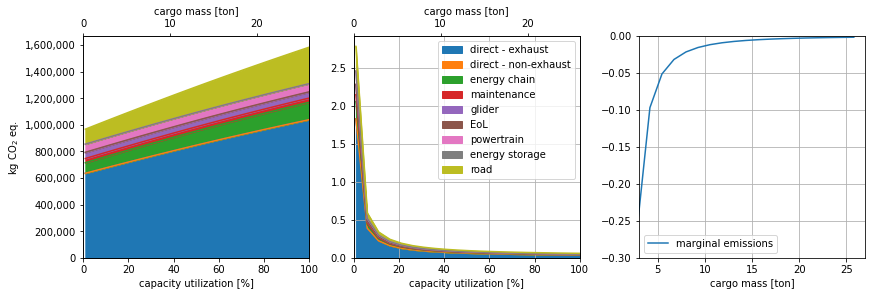

In [177]:
fig1, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(12,4))

cols_total=[
    "direct - exhaust - total",
    "direct - non-exhaust - total",
    "energy chain - total",
    "maintenance - total",
    "glider - total",
    "EoL - total",
    "powertrain - total",
    "energy storage - total",
    "road - total",
]

cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),:].plot(x="capacity utilization [%]",
                                                                     y=cols_total,
                                                                     kind="area", ax=axes[0])
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].set_ylabel("kg CO$_2$ eq.")
axes[0].get_legend().remove()
axes[0].set_xlim(0,100)

ax2 = axes[0].twiny()
vals = (df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"total cargo mass [kg]"]/1000).values
vals = np.round(vals, 0)
ax2.set_xticks(vals)
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_xlabel("cargo mass [ton]")


df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),:].plot(x="capacity utilization [%]",
                                                                     y=cols,
                                                                     kind="area", ax=axes[1])


axes[1].legend()
axes[1].grid()
axes[1].set_xlim(0,100)
ax3 = axes[1].twiny()
ax3.set_xticks(vals)
ax3.xaxis.set_major_locator(plt.MaxNLocator(3))
ax3.set_xlabel("cargo mass [ton]")

vals_marg=df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),cols_total].sum(axis=1).diff()/\
    ((df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"total cargo mass [kg]"]/1000)*\
    df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"lifetime [km]"]).values

vals_marg=df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),cols].sum(axis=1).diff()

xs=df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"total cargo mass [kg]"].values/1000
axes[2].plot(xs, vals_marg.values, label="marginal emissions")
axes[2].set_xlabel("cargo mass [ton]")
axes[2].legend()
axes[2].set_xlim(3,)
axes[2].set_ylim(-.3,0)
axes[2].grid()

fig1.savefig("fig1.png", dpi=300)

In [172]:
df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),:]

,powertrain type,size,target range [km],lifetime [km],curb mass [kg],total cargo mass [kg],capacity utilization [%],energy battery mass [kg],fuel mass [kg],electric energy stored [kWh],oxidation energy stored [kj],direct - exhaust,direct - non-exhaust,energy chain,maintenance,glider,EoL,powertrain,energy storage,road,fuel consumption per 100 km,direct - exhaust - total,direct - non-exhaust - total,energy chain - total,maintenance - total,glider - total,EoL - total,powertrain - total,energy storage - total,road - total
3,ICEV-d,40t,800.0,1050000.0,14363.618403,330.613816,1.0,0.0,150.212954,0.0,1776.932816,1.830973,4.776266e-23,0.228300,0.091102,0.126288,0.009169,0.173961,0.001679,0.324282,18.776619,6.356121e+05,1.658054e-17,79252.921996,31625.547330,43840.075719,3182.945744,60389.589556,582.755961,112572.835805
39,ICEV-d,40t,800.0,1050000.0,14370.157319,1608.290561,6.0,0.0,155.666853,0.0,1841.449301,0.389677,3.847125e-38,0.048635,0.018728,0.025961,0.001885,0.035765,0.000351,0.071524,19.458357,6.580490e+05,6.496659e-32,82130.421103,31625.548521,43840.077283,3182.945718,60397.379960,593.190390,120782.744270
75,ICEV-d,40t,800.0,1050000.0,14376.662391,2885.317137,11.0,0.0,161.075520,0.0,1905.430729,0.224552,8.038118e-17,0.028051,0.010439,0.014471,0.001051,0.019939,0.000199,0.042576,20.134440,6.802997e+05,2.435215e-10,84984.051724,31625.546287,43840.077119,3182.945394,60405.788134,603.183237,128988.270713
111,ICEV-d,40t,800.0,1050000.0,14383.077757,4161.707559,16.0,0.0,166.426481,0.0,1968.729514,0.160720,0.000000e+00,0.020094,0.007237,0.010033,0.000728,0.013825,0.000140,0.031395,20.803310,7.023131e+05,0.000000e+00,87807.237005,31625.546363,43840.078482,3182.945548,60414.077424,612.744700,137189.158592
147,ICEV-d,40t,800.0,1050000.0,14389.409282,5437.474051,21.0,0.0,171.723378,0.0,2031.388760,0.126828,0.000000e+00,0.015869,0.005539,0.007679,0.000557,0.010583,0.000109,0.025464,21.465422,7.241041e+05,0.000000e+00,90601.900014,31625.547619,43840.079633,3182.945730,60422.262702,621.911350,145385.512109
183,ICEV-d,40t,800.0,1050000.0,14395.679903,6712.623225,26.0,0.0,176.984113,0.0,2093.620231,0.105806,4.411576e-17,0.013248,0.004487,0.006220,0.000452,0.008574,0.000089,0.021789,22.123014,7.457462e+05,3.109391e-10,93377.488318,31625.546549,43840.082252,3182.945558,60430.358573,630.739775,153577.522296
219,ICEV-d,40t,800.0,1050000.0,14401.854855,7987.174995,31.0,0.0,182.177945,0.0,2155.060270,0.091470,0.000000e+00,0.011461,0.003771,0.005227,0.000380,0.007207,0.000076,0.019289,22.772243,7.671133e+05,0.000000e+00,96117.766096,31625.547141,43840.078835,3182.945667,60438.344652,639.202196,161765.146607
255,ICEV-d,40t,800.0,1050000.0,14407.964744,9261.132692,36.0,0.0,187.329812,0.0,2216.003886,0.081067,1.917774e-17,0.010164,0.003252,0.004508,0.000327,0.006216,0.000067,0.017477,23.416226,7.883076e+05,1.864880e-10,98835.918610,31625.548197,43840.076553,3182.945547,60446.242999,647.361137,169948.480825
291,ICEV-d,40t,800.0,1050000.0,14414.026297,10534.499218,41.0,0.0,192.452780,0.0,2276.605651,0.073173,1.433456e-29,0.009180,0.002859,0.003963,0.000288,0.005465,0.000059,0.016104,24.056597,8.093830e+05,1.585578e-22,101538.814147,31625.545246,43840.083259,3182.945577,60454.075769,655.254759,178127.787413
327,ICEV-d,40t,800.0,1050000.0,14419.993067,11807.303189,46.0,0.0,197.506319,0.0,2336.386113,0.066962,2.982221e-17,0.008405,0.002551,0.003536,0.000257,0.004877,0.000053,0.015027,24.688290,8.301728e+05,3.697259e-10,104205.080841,31625.546814,43840.079579,3182.945537,60461.784635,662.838213,186302.886809


In [173]:
tip = ct.TruckInputParameters() 
tip.static()
_, array = ct.fill_xarray_from_input_parameters(tip)

In [89]:
l_res_2020=[
    [
    "powertrain type",
    "size",
    "target range [km]",
    "lifetime [km]",
    "curb mass [kg]",
    "total cargo mass [kg]",
    "capacity utilization [%]",
    "energy battery mass [kg]",
    "fuel mass [kg]",
    "electric energy stored [kWh]",
    "oxidation energy stored [kj]",
    'direct - exhaust',
    'direct - non-exhaust',
    'energy chain',
    'maintenance',
    'glider',
    'EoL',
    'powertrain',
    'energy storage',
    'road'
    ]
      ]

l_res_2050 = [
    [
    "powertrain type",
    "size",
    "target range [km]",
    "lifetime [km]",
    "curb mass [kg]",
    "total cargo mass [kg]",
    "capacity utilization [%]",
    "energy battery mass [kg]",
    "fuel mass [kg]",
    "electric energy stored [kWh]",
    "oxidation energy stored [kj]",
    'direct - exhaust',
    'direct - non-exhaust',
    'energy chain',
    'maintenance',
    'glider',
    'EoL',
    'powertrain',
    'energy storage',
    'road'
    ]
      ]
      
for target_range in np.arange(100, 1300, 100):
    
    tm = ct.TruckModel(array, cycle="Long haul", country="RER")
    tm.array.loc[dict(parameter="target range")] = target_range
    tm.set_all()
    
    ic = ct.InventoryCalculation(tm.array, fuel_blend=tm.fuel_blend, country=tm.country)
    res = ic.calculate_impacts()
    
    for pt in tm.array.powertrain.values:
        for s in tm.array.coords["size"].values:
            specs_2020 = [pt, s]
            specs_2020.extend(tm.array.sel(powertrain=pt,
                                      size=s,
                                      year=2020,
                                      value=0,
                                      parameter=[
                                        "target range",
                                        "lifetime kilometers",
                                        "curb mass",
                                        "total cargo mass",
                                        "capacity utilization",
                                        "energy battery mass",
                                        "fuel mass",
                                        "electric energy stored",
                                        "oxidation energy stored",
                                      ]).values.tolist()
                        )
            
            specs_2050 = [pt, s]
            specs_2050.extend(tm.array.sel(powertrain=pt,
                                      size=s,
                                      year=2050,
                                      value=0,
                                      parameter=[
                                        "target range",
                                        "lifetime kilometers",
                                        "curb mass",
                                        "total cargo mass",
                                        "capacity utilization",
                                        "energy battery mass",
                                        "fuel mass",
                                        "electric energy stored",
                                        "oxidation energy stored",
                                      ]).values.tolist()
                        )
            
            lcia_2020 = res.sel(powertrain=pt, size=s, year=2020, impact_category="climate change", value=0).values.tolist()
            specs_2020.extend(lcia_2020)
            
            lcia_2050 = res.sel(powertrain=pt, size=s, year=2050, impact_category="climate change", value=0).values.tolist()
            specs_2050.extend(lcia_2050)
            
            l_res_2020.append(specs_2020)
            l_res_2050.append(specs_2050)

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2000    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2010    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2020    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2030    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2040    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   BEV, 2050    | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2000   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2010   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2020   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2030   | 0.64 | 0.73 | 0.83 | 0.73 | 0.73 | 0.83 |
|   FCEV, 2040   | 0.64 | 0.73 | 0.83 | 0.

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [92]:
l_res_2020

[['powertrain type',
  'size',
  'target range [km]',
  'lifetime [km]',
  'curb mass [kg]',
  'total cargo mass [kg]',
  'capacity utilization [%]',
  'energy battery mass [kg]',
  'fuel mass [kg]',
  'electric energy stored [kWh]',
  'oxidation energy stored [kj]',
  'direct - exhaust',
  'direct - non-exhaust',
  'energy chain',
  'maintenance',
  'glider',
  'EoL',
  'powertrain',
  'energy storage',
  'road'],
 ['ICEV-d',
  '18t',
  100.0,
  400000.0,
  7705.520476607686,
  6615.466894971081,
  0.64,
  0.0,
  17.475273685371963,
  0.0,
  206.72243292740043,
  0.0844070091843605,
  0.0,
  0.010618717409670353,
  0.004930709954351187,
  0.008108471520245075,
  0.0004872679419349879,
  0.012950800359249115,
  -1.762831561791245e-05,
  0.015862785279750824],
 ['ICEV-d',
  '26t',
  100.0,
  560000.0,
  8802.85376889196,
  12574.166748708869,
  0.73,
  0.0,
  22.23476816290772,
  0.0,
  263.0245141202293,
  0.05625416338443756,
  0.0,
  0.007108238060027361,
  0.0028296972159296274,
  0

In [95]:
df_km_2020 = pd.DataFrame(l_res_2020[1:], columns=l_res_2020[0])
df_km_2020.loc[df_km_2020["direct - non-exhaust"]<0,"direct - non-exhaust"] = 0
df_km_2020.loc[df_km_2020["direct - exhaust"]<0,"direct - exhaust"] = 0
df_km_2020.loc[:,"capacity utilization [%]"] *= 100
df_km_2020.loc[:, "fuel consumption per 100 km"] = (df_km_2020.loc[:,"fuel mass [kg]"]/df_km_2020.loc[:,"target range [km]"])*100

In [96]:
df_km_2050 = pd.DataFrame(l_res_2050[1:], columns=l_res_2050[0])
df_km_2050.loc[df_km_2050["direct - non-exhaust"]<0,"direct - non-exhaust"] = 0
df_km_2050.loc[df_km_2050["direct - exhaust"]<0,"direct - exhaust"] = 0
df_km_2050.loc[:,"capacity utilization [%]"] *= 100
df_km_2050.loc[:, "fuel consumption per 100 km"] = (df_km_2050.loc[:,"fuel mass [kg]"]/df_km_2050.loc[:,"target range [km]"])*100


In [97]:
cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df_total = ((df_km_2020.loc[:,"total cargo mass [kg]"]/1000)*df_km_2020.loc[:,"lifetime [km]"]*df_km_2020.loc[:,cols].T).T
df_total.columns=[c+" - total" for c in df_total.columns]
df_km_2020 = pd.concat([df_km_2020, df_total], axis=1)

df_total_2050 = ((df_km_2050.loc[:,"total cargo mass [kg]"]/1000)*df_km_2050.loc[:,"lifetime [km]"]*df_km_2050.loc[:,cols].T).T
df_total_2050.columns=[c+" - total" for c in df_total_2050.columns]
df_km_2050 = pd.concat([df_km_2050, df_total_2050], axis=1)

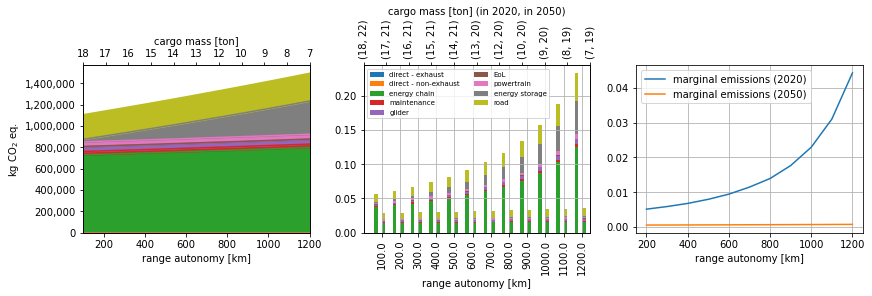

In [133]:
fig1, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(12,4))

cols_total=[
    "direct - exhaust - total",
    "direct - non-exhaust - total",
    "energy chain - total",
    "maintenance - total",
    "glider - total",
    "EoL - total",
    "powertrain - total",
    "energy storage - total",
    "road - total",
]

cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df_km_2020.loc[(df_km_2020["powertrain type"]=="BEV")&(df_km_2020["size"]=="40t"),:].plot(x="target range [km]",
                                                                     y=cols_total,
                                                                     kind="area", ax=axes[0], stacked=True)
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].set_ylabel("kg CO$_2$ eq.")
axes[0].get_legend().remove()
axes[0].set_xlabel("range autonomy [km]")
axes[0].set_xlim(100,1200)


ax2_km = axes[0].twiny()
vals = (df_km_2020.loc[(df_km_2020["powertrain type"]=="BEV")
                       &(df_km_2020["size"]=="40t"),"total cargo mass [kg]"]/1000).sort_values(ascending=False)
vals = [int(v) for v in vals]

vals_2050 = (df_km_2050.loc[(df_km_2050["powertrain type"]=="BEV")
                       &(df_km_2050["size"]=="40t"),"total cargo mass [kg]"]/1000).sort_values(ascending=False)
vals_2050 = [int(v) for v in vals_2050]

ax2_km.xaxis.set_major_locator(plt.MaxNLocator(12))

ax2_km.set_xticklabels(vals)
ax2_km.set_xlabel("cargo mass [ton]")


df_km_2020.loc[(df_km_2020["powertrain type"]=="BEV")&(df_km_2020["size"]=="40t"),:]\
    .plot(x="target range [km]",y=["direct - exhaust","direct - non-exhaust","energy chain","maintenance","glider",
                      "EoL","powertrain","energy storage","road"], kind="bar", stacked=True, ax=axes[1],
                                      width=.2, position=2)

df_km_2050.loc[(df_km_2050["powertrain type"]=="BEV")&(df_km_2050["size"]=="40t"),:]\
    .plot(x="target range [km]",y=["direct - exhaust","direct - non-exhaust","energy chain","maintenance","glider",
                      "EoL","powertrain","energy storage","road"], kind="bar", stacked=True, ax=axes[1],
                                      width=.2, position=0)

axes[1].set_xlim(-1,)
axes[1].set_xlabel("range autonomy [km]")
axes[1].legend(["direct - exhaust","direct - non-exhaust","energy chain","maintenance","glider",
                      "EoL","powertrain","energy storage","road"], ncol=2, prop={'size': 7})
axes[1].grid()

ax3_km = axes[1].twiny()
ax3_km.xaxis.set_major_locator(plt.MaxNLocator(12))

ax3_km.set_xticklabels(zip(vals, vals_2050), rotation=90)
ax3_km.set_xlabel("cargo mass [ton] (in 2020, in 2050)")



vals_marg=df_km_2020.loc[(df_km_2020["powertrain type"]=="BEV")&(df_km_2020["size"]=="40t"),cols].sum(axis=1).diff()

xs=df_km_2020.loc[(df_km_2020["powertrain type"]=="BEV")&(df_km_2020["size"]=="40t"),"target range [km]"].values

axes[2].plot(xs, vals_marg.values, label="marginal emissions (2020)")



vals_marg_2050=df_km_2050.loc[(df_km_2050["powertrain type"]=="BEV")&(df_km_2050["size"]=="40t"),cols].sum(axis=1).diff()

xs=df_km_2050.loc[(df_km_2050["powertrain type"]=="BEV")&(df_km_2050["size"]=="40t"),"target range [km]"].values

axes[2].plot(xs, vals_marg_2050.values, label="marginal emissions (2050)")


axes[2].set_xlabel("range autonomy [km]")
axes[2].legend()
axes[2].grid()

fig1.savefig("fig2.png", dpi=300)

In [124]:
df_km_2020.loc[(df_km_2020["powertrain type"]=="BEV")&(df_km_2020["size"]=="40t"),"energy battery mass [kg]"]

27      1402.613826
63      2827.615842
99      4275.598130
135     5745.465893
171     7240.539382
207     8760.276181
243    10310.598080
279    11876.234176
315    13473.732262
351    15098.532192
387    16751.467664
423    18433.847307
Name: energy battery mass [kg], dtype: float64

In [125]:
df_km_2050.loc[(df_km_2050["powertrain type"]=="BEV")&(df_km_2050["size"]=="40t"),"energy battery mass [kg]"]

27      347.359698
63      695.834957
99     1045.509267
135    1396.411384
171    1748.734326
207    2102.595037
243    2458.120872
279    2815.016274
315    3173.605969
351    3533.781514
387    3895.702841
423    4259.555755
Name: energy battery mass [kg], dtype: float64

In [63]:
vals_marg

27          NaN
63     0.005116
99     0.005865
135    0.006767
171    0.007947
207    0.009435
243    0.011463
279    0.013927
315    0.017653
351    0.022938
387    0.031018
423    0.044299
459    0.068404
495    0.119530
531    0.262165
dtype: float64

In [84]:
xy=df_km.loc[(df["powertrain type"]=="BEV")&(df_km["size"]=="40t"),"total cargo mass [kg]"]/1000
list(zip(vals_marg, xs, xy))

[(nan, 100.0, 18.681543546758792),
 (0.005019989563152194, 200.0, 17.64141172925018),
 (0.005744367415900342, 300.0, 16.584831715650687),
 (0.006613853445742279, 400.0, 15.513151112528455),
 (0.007749209355097264, 500.0, 14.42295926648684),
 (0.009229224218870513, 600.0, 13.311513117145045),
 (0.011055841940106101, 700.0, 12.184556979874108),
 (0.013552656979299874, 800.0, 11.038938239961919),
 (0.01684537055552937, 900.0, 9.881320444495548),
 (0.021887702052481472, 1000.0, 8.698451536116035),
 (0.02934448150337507, 1100.0, 7.49552587333445),
 (0.04141700064063239, 1200.0, 6.271546722969079),
 (0.0628358410909653, 1300.0, 5.02632962443356),
 (0.10665631445535717, 1400.0, 3.759370493378303),
 (0.2208570847287774, 1500.0, 2.4700894491473346)]

In [20]:
df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),["lifetime [km]", "total cargo mass [kg]", "road"]]

,lifetime [km],total cargo mass [kg],road
27,1050000.0,18681.543547,0.011742
63,1050000.0,17641.411729,0.012567
99,1050000.0,16584.831716,0.013511
135,1050000.0,15513.151113,0.014600
171,1050000.0,14422.959266,0.015873
207,1050000.0,13311.513117,0.017387
243,1050000.0,12184.556980,0.019203
279,1050000.0,11038.938240,0.021430
315,1050000.0,9881.320444,0.024204
351,1050000.0,8698.451536,0.027801


In [109]:
df.to_excel("results.xlsx")

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2